
write a programme to implement k-Nearest Neighbour algorithm to classify the iris dataset.Print Both correct and wrong predictions.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df['output']=iris.target#contains labels for each sample
df['output']

,output
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   output             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
output,0


In [ ]:
from collections import Counter
Counter(df['output'])

Counter({0: 50, 1: 50, 2: 50})

<Axes: xlabel='output', ylabel='count'>

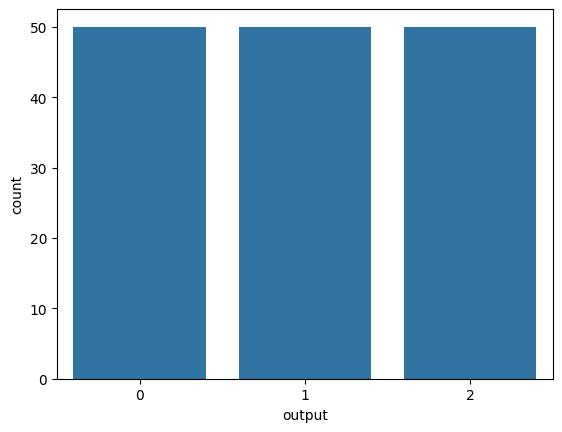

In [ ]:
sns.countplot(x='output',data=df)

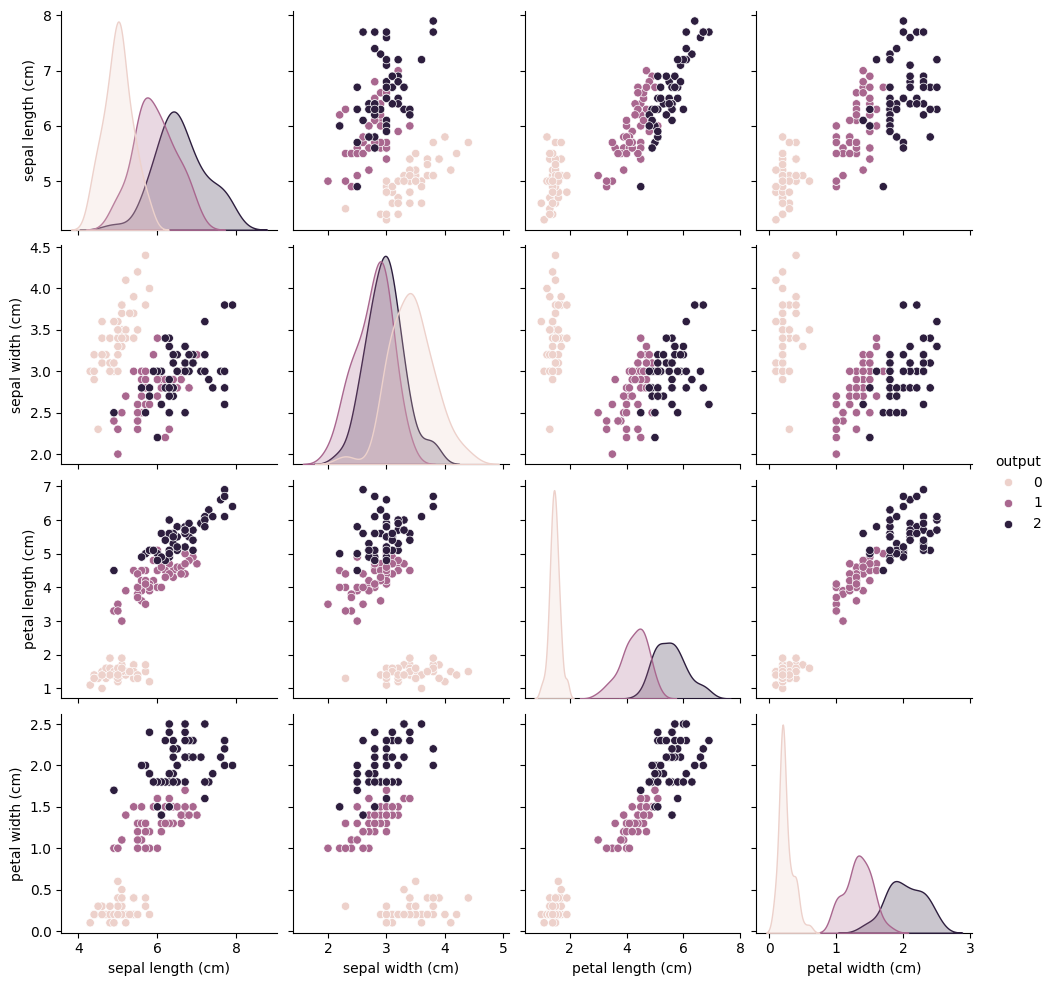

In [ ]:
sns.pairplot(df,hue='output')

In [ ]:
del df['petal length (cm)']

In [ ]:
df

,sepal length (cm),sepal width (cm),petal width (cm),output
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0
...,...,...,...,...
145,6.7,3.0,2.3,2
146,6.3,2.5,1.9,2
147,6.5,3.0,2.0,2
148,6.2,3.4,2.3,2


In [ ]:
x=df.iloc[:,:3]
y=df.iloc[:,3]

In [ ]:
x

,sepal length (cm),sepal width (cm),petal width (cm)
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [ ]:
y

,output
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [ ]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.31544430e+00],
       [-1.26418478e+00, -1.31979479e-01, -1.44707648e+00],
       [-1.87002413e+00, -1.31979479e-01, -1.44707648e+00],
       [-5.25060772e-02,  2.16998818e+00, -1.31544430e+00],
       [-1.73673948e-01,  3.09077525e+00, -1.05217993e+00],
       [-5.37177559e-01,  1.93979142e+00

In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 3), (45, 3), (105,), (45,))

In [ ]:
#Evaluate performance for different value of k
from sklearn.neighbors import KNeighborsClassifier
neighbours=np.arange(1,14)#creates an array for different k values
train_accuracy=np.empty(len(neighbours))#arrays will store the training
test_accuracy=np.empty(len(neighbours))#testing accuracy for each value of k
for i,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k)#A KNeighboursClassifier is trained
    knn.fit(X_train,y_train)
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)

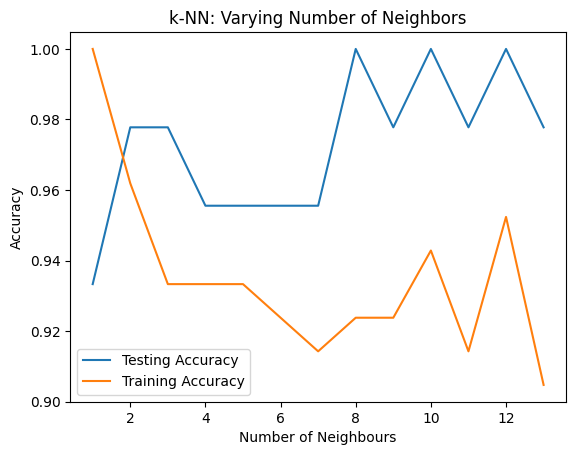

In [ ]:
#plot accuracy vs.number of neighbours
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbours,test_accuracy,label='Testing Accuracy')
plt.plot(neighbours,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9777777777777777

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9333333333333333

In [ ]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[19,  0,  0],
       [ 0, 10,  3],
       [ 0,  0, 13]])

In [ ]:
#print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.77      0.87        13
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45



In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9555555555555556

In [ ]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[19,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 13]])

In [ ]:
#print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

